In [1]:
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
TRAIN_PATH='../input/sales_train.csv'
TEST_PATH='../input/test.csv'
SAMPLE_PATH='../input/sample_submission.csv'
ITEM_PATH='../input/items.csv'
ITEM_CATEGORIES_PATH='../input/item_categories.csv'
SHOP_PATH='../input/shops.csv'

In [3]:
test=pd.read_csv(TEST_PATH)

In [4]:
data=pd.read_pickle('data.pkl')

In [5]:
data = data[[
    'date_block_num',
    'shop_id',
    'item_id',
    'item_cnt_month',
    'city_code',
    'item_category_id',
    'type_code',
    'subtype_code',
    'item_cnt_month_lag_1',
    'item_cnt_month_lag_2',
    'item_cnt_month_lag_3',
    'item_cnt_month_lag_6',
    'item_cnt_month_lag_12',
    'date_avg_item_cnt_lag_1',
    'date_item_avg_item_cnt_lag_1',
    'date_item_avg_item_cnt_lag_2',
    'date_item_avg_item_cnt_lag_3',
    'date_item_avg_item_cnt_lag_6',
    'date_item_avg_item_cnt_lag_12',
    'date_shop_avg_item_cnt_lag_1',
    'date_shop_avg_item_cnt_lag_2',
    'date_shop_avg_item_cnt_lag_3',
    'date_shop_avg_item_cnt_lag_6',
    'date_shop_avg_item_cnt_lag_12',
    'date_cat_avg_item_cnt_lag_1',
    'date_shop_cat_avg_item_cnt_lag_1',
    #'date_shop_type_avg_item_cnt_lag_1',
    #'date_shop_subtype_avg_item_cnt_lag_1',
    'date_city_avg_item_cnt_lag_1',
    'date_item_city_avg_item_cnt_lag_1',
    #'date_type_avg_item_cnt_lag_1',
    #'date_subtype_avg_item_cnt_lag_1',
    'delta_price_lag',
    'month',
    'days',
    'item_shop_last_sale',
    'item_last_sale',
    'item_shop_first_sale',
    'item_first_sale',
]]

In [6]:
X_train = data[data.date_block_num < 33].drop(['item_cnt_month'], axis=1)
Y_train = data[data.date_block_num < 33]['item_cnt_month']
X_valid = data[data.date_block_num == 33].drop(['item_cnt_month'], axis=1)
Y_valid = data[data.date_block_num == 33]['item_cnt_month']
X_test = data[data.date_block_num == 34].drop(['item_cnt_month'], axis=1)

In [7]:
X_data=data.drop(['item_cnt_month'],axis=1)
Y_data=data['item_cnt_month']

In [8]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
forest=RandomForestRegressor()

forest.fit(X_data,Y_data)

Y_pred = forest.predict(X_valid).clip(0, 20)
Y_test = forest.predict(X_test).clip(0, 20)

submission = pd.DataFrame({
    "ID": test.index, 
    "item_cnt_month": Y_test
})
submission.to_csv('forest_submission2.csv', index=False)

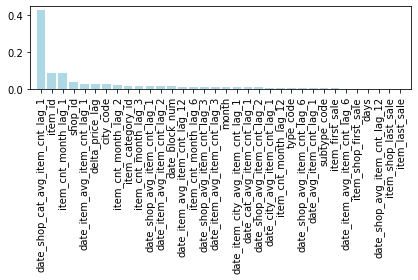

['date_shop_cat_avg_item_cnt_lag_1' 'item_id' 'item_cnt_month_lag_1'
 'shop_id' 'date_item_avg_item_cnt_lag_1' 'delta_price_lag' 'city_code'
 'item_cnt_month_lag_2' 'item_category_id' 'item_cnt_month_lag_3'
 'date_shop_avg_item_cnt_lag_1' 'date_item_avg_item_cnt_lag_2'
 'date_block_num' 'date_item_avg_item_cnt_lag_12' 'item_cnt_month_lag_6'
 'date_shop_avg_item_cnt_lag_3' 'date_item_avg_item_cnt_lag_3' 'month'
 'date_item_city_avg_item_cnt_lag_1' 'date_cat_avg_item_cnt_lag_1'
 'date_shop_avg_item_cnt_lag_2' 'date_city_avg_item_cnt_lag_1'
 'item_cnt_month_lag_12' 'type_code' 'date_shop_avg_item_cnt_lag_6'
 'date_avg_item_cnt_lag_1' 'subtype_code' 'item_first_sale'
 'date_item_avg_item_cnt_lag_6' 'item_shop_first_sale' 'days'
 'date_shop_avg_item_cnt_lag_12' 'item_shop_last_sale' 'item_last_sale']


In [17]:
importances=forest.feature_importances_
indices=np.argsort(importances)[::-1]
feat_labels=np.array(X_data.columns)

plt.bar(range(X_train.shape[1]),importances[indices],color='lightblue',align='center')
plt.xticks(range(X_train.shape[1]),feat_labels[indices],rotation=90)
plt.xlim([-1,X_train.shape[1]])
plt.tight_layout()
plt.show()
print(feat_labels[indices])

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
forest=RandomForestRegressor(max_features='auto',n_estimators=1000)

grid_dict=[{'max_depth':[6,8,10]}]
model=GridSearchCV(estimator=forest,param_grid=grid_dict)
model.fit(X_data,Y_data)

Y_pred = model.predict(X_valid).clip(0, 20)
Y_test = model.predict(X_test).clip(0, 20)

submission = pd.DataFrame({
    "ID": test.index, 
    "item_cnt_month": Y_test
})
submission.to_csv('forest_submission3.csv', index=False)

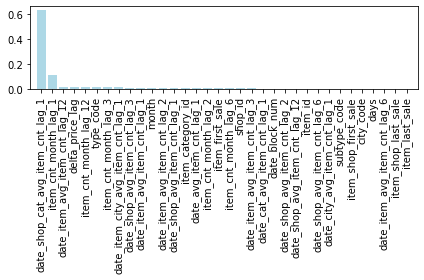

['date_shop_cat_avg_item_cnt_lag_1' 'item_cnt_month_lag_1'
 'date_item_avg_item_cnt_lag_12' 'delta_price_lag' 'item_cnt_month_lag_12'
 'type_code' 'item_cnt_month_lag_3' 'date_item_city_avg_item_cnt_lag_1'
 'date_shop_avg_item_cnt_lag_3' 'date_item_avg_item_cnt_lag_1' 'month'
 'date_item_avg_item_cnt_lag_2' 'date_shop_avg_item_cnt_lag_1'
 'item_category_id' 'date_avg_item_cnt_lag_1' 'item_cnt_month_lag_2'
 'item_first_sale' 'item_cnt_month_lag_6' 'shop_id'
 'date_item_avg_item_cnt_lag_3' 'date_cat_avg_item_cnt_lag_1'
 'date_block_num' 'date_shop_avg_item_cnt_lag_2'
 'date_shop_avg_item_cnt_lag_12' 'item_id' 'date_shop_avg_item_cnt_lag_6'
 'date_city_avg_item_cnt_lag_1' 'subtype_code' 'item_shop_first_sale'
 'city_code' 'days' 'date_item_avg_item_cnt_lag_6' 'item_shop_last_sale'
 'item_last_sale']


In [25]:
importances=model.best_estimator_.feature_importances_
indices=np.argsort(importances)[::-1]
feat_labels=np.array(X_data.columns)

plt.bar(range(X_train.shape[1]),importances[indices],color='lightblue',align='center')
plt.xticks(range(X_train.shape[1]),feat_labels[indices],rotation=90)
plt.xlim([-1,X_train.shape[1]])
plt.tight_layout()
plt.show()
print(feat_labels[indices])

In [27]:

X_data[feat_labels[indices]].describe()

,date_shop_cat_avg_item_cnt_lag_1,item_cnt_month_lag_1,date_item_avg_item_cnt_lag_12,delta_price_lag,item_cnt_month_lag_12,type_code,item_cnt_month_lag_3,date_item_city_avg_item_cnt_lag_1,date_shop_avg_item_cnt_lag_3,date_item_avg_item_cnt_lag_1,...,item_id,date_shop_avg_item_cnt_lag_6,date_city_avg_item_cnt_lag_1,subtype_code,item_shop_first_sale,city_code,days,date_item_avg_item_cnt_lag_6,item_shop_last_sale,item_last_sale
count,6.639294e+06,6.639294e+06,6.639294e+06,6.639294e+06,6.639294e+06,6.639294e+06,6.639294e+06,6.639294e+06,6.639294e+06,6.639294e+06,...,6.639294e+06,6.639294e+06,6.639294e+06,6.639294e+06,6.639294e+06,6.639294e+06,6.639294e+06,6.639294e+06,6.639294e+06,6.639294e+06
mean,NaN,NaN,NaN,NaN,NaN,1.099628e+01,NaN,NaN,NaN,NaN,...,1.126362e+04,NaN,NaN,1.953048e+01,1.224229e+01,1.653656e+01,3.039279e+01,NaN,1.301045e+00,-9.506759e-01
std,NaN,NaN,NaN,0.000000e+00,NaN,2.978096e+00,NaN,NaN,0.000000e+00,NaN,...,6.271893e+03,0.000000e+00,0.000000e+00,2.084926e+01,8.389942e+00,7.995480e+00,8.900391e-01,NaN,1.695546e+00,4.175015e-01
min,0.000000e+00,0.000000e+00,0.000000e+00,-1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,2.800000e+01,0.000000e+00,-1.000000e+00,-1.000000e+00
25%,1.999512e-01,1.999512e-01,0.000000e+00,-4.635620e-02,0.000000e+00,1.100000e+01,0.000000e+00,1.999512e-01,0.000000e+00,2.163086e-01,...,5.680000e+03,0.000000e+00,3.041992e-01,2.000000e+00,5.000000e+00,1.200000e+01,3.000000e+01,0.000000e+00,1.000000e+00,-1.000000e+00
50%,2.858887e-01,1.999512e-01,0.000000e+00,0.000000e+00,0.000000e+00,1.100000e+01,1.999512e-01,1.999512e-01,3.781738e-01,2.653809e-01,...,1.137200e+04,3.593750e-01,3.896484e-01,1.000000e+01,1.200000e+01,1.500000e+01,3.100000e+01,2.479248e-01,1.000000e+00,-1.000000e+00
75%,4.250488e-01,1.999512e-01,3.391113e-01,2.127075e-02,1.999512e-01,1.300000e+01,1.999512e-01,2.800293e-01,4.775391e-01,4.040527e-01,...,1.653600e+04,4.641113e-01,5.537109e-01,3.500000e+01,1.800000e+01,2.300000e+01,3.100000e+01,3.911133e-01,1.000000e+00,-1.000000e+00
max,1.305000e+03,1.305000e+03,2.730000e+02,3.011719e+00,1.305000e+03,1.900000e+01,1.305000e+03,1.242000e+03,2.312500e+00,2.730000e+02,...,2.216900e+04,2.312500e+00,1.532227e+00,6.400000e+01,3.400000e+01,3.100000e+01,3.100000e+01,2.730000e+02,3.300000e+01,3.300000e+01
